__EDA__ involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better.

As we noticed in the `Data_Wrangling` notebook, the data is pretty much clean with no NaN observations.

## Import libraries

In [1]:
# Essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
# sns.set(rc={"figure.dpi":300})
# plt.rcParams["figure.dpi"] = 300


## Read data

In [2]:
# Importing train and test subsets
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [3]:
# Take a look at the data
train.sample(n=5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
124999,9cb01db01240afa7,this episode BUTCHERED CANON and it makes me s...,0,0,0,0,0,0
48135,80a593e5a12e4e1a,The Shameless \n\nI didn't add incorrect infor...,0,0,0,0,0,0
134318,ce3cfcd5b55a614c,", 18 May 2007 (UTC)\n I found another reported...",0,0,0,0,0,0
70751,bd58658d16325e3a,"""\nI checked my page, here - link, it shows th...",0,0,0,0,0,0
51516,89d05ee84145adb0,If you want a good laugh take a look at the la...,0,0,0,0,0,0


The data comes from a large number of Wikipedia comments which have been labeled by human raters for toxic behavior.

In [4]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None


## Data analysis

In [5]:
# print total observations in train and test subsets
print("Train: {}".format(train.shape))
print("Test:  {}".format(test.shape))

Train: (159571, 8)
Test:  (153164, 2)


In [6]:
# Copy dataframe for manipulation
X = train.copy()

# Check for clean comments
X["tags"] = np.sum(X.iloc[:, 2:], axis=1)
print(X["tags"].sample(10))
X["is_clean"] = X["tags"].apply(lambda x : 1 if x == 0 else 0)

119450    0
157238    0
40482     0
47521     0
6138      0
128747    0
137667    0
132523    0
81600     0
4381      0
Name: tags, dtype: int64


We can notice that there are multiple cases where a comment has more than one label.

In [7]:
X.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,tags,is_clean
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,1
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,1


In [8]:
total_comm = X.shape[0]
total_clean_comm = X["is_clean"].sum()
total_not_clean_comm = total_comm - total_clean_comm

print("Total comments: {}".format(total_comm))
print("Total clean comments: {}".format(total_clean_comm))
print("Total not clean comments: {}".format(total_not_clean_comm))

Total comments: 159571
Total clean comments: 143346
Total not clean comments: 16225


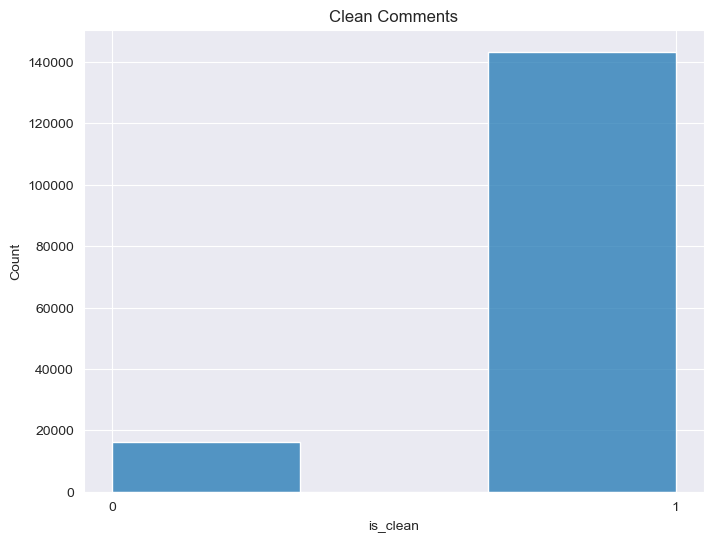

In [9]:
# Visualization of comments
f, ax = plt.subplots(figsize=(8, 6))
sns.histplot(X["is_clean"], bins=3)
ax.set_xticks([0, 1])
ax.set_title("Clean Comments")
plt.show()

In [10]:
comment_types = X.iloc[:, 2:-2].sum()
print(comment_types)

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


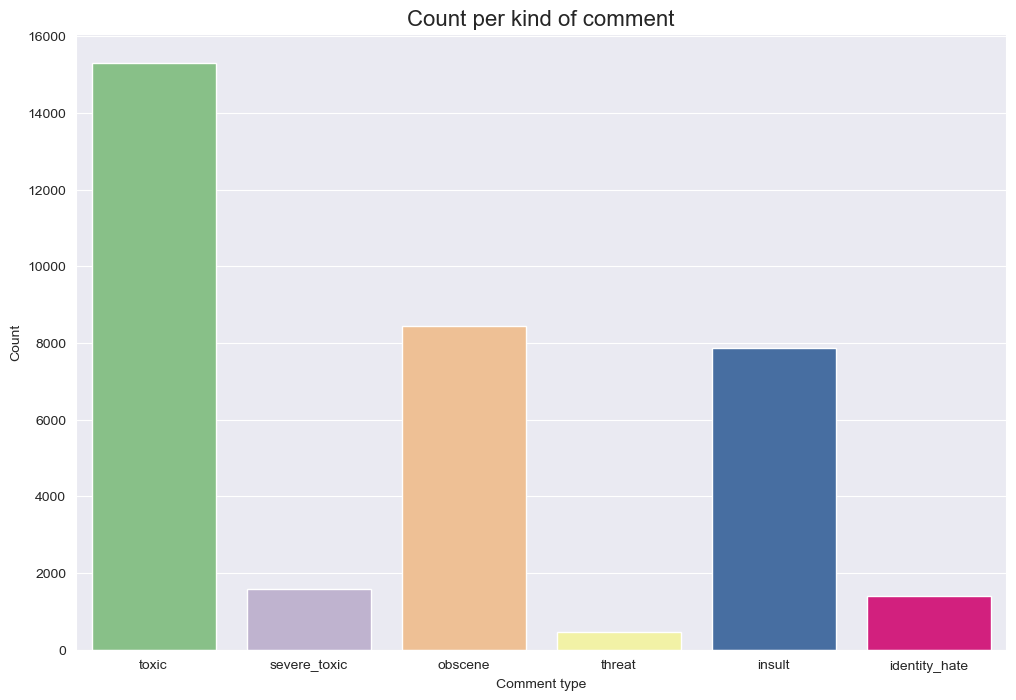

In [11]:
f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(
    x=comment_types.index,
    y=comment_types.values,
    palette="Accent"
)
ax.set_title("Count per kind of comment", fontsize=16)
ax.set_xlabel("Comment type")
ax.set_ylabel("Count")
plt.show()

As from the above graph, we notice that the different types of comments are not normally distributed, so we might face a class imbalance problem.

Let's check how many coments have multiple tags

In [12]:
count_tags = X["tags"].value_counts()
print(count_tags)

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: tags, dtype: int64


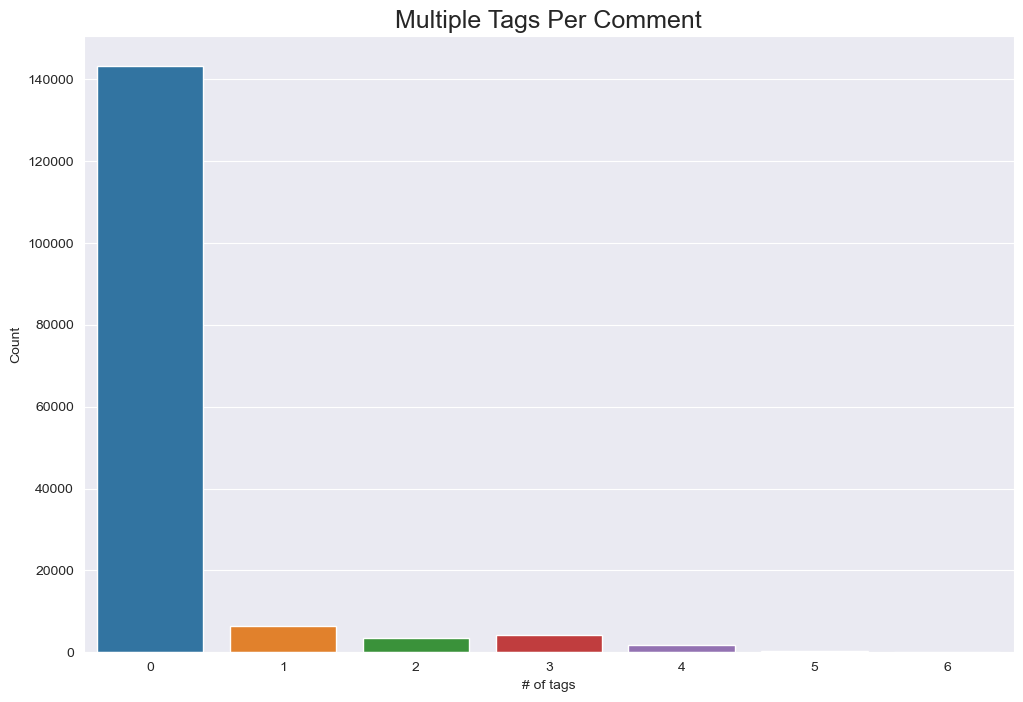

In [13]:
f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(
    x=count_tags.index,
    y=count_tags.values
)
ax.set_title("multiple tags per comment".title(),
            fontsize=18)
ax.set_xlabel("# of tags")
ax.set_ylabel("Count")
plt.show()

## Relationship between features

Let's have a look at the relation between tags.

In [14]:
# Correlation plot
# Isolate columns for our correlation matrix.
corr_columns = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
corr_df = X[corr_columns]

# Correlation matrix
corr = corr_df.corr()
corr

,toxic,severe_toxic,obscene,threat,insult,identity_hate
toxic,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
severe_toxic,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
obscene,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
insult,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
identity_hate,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


We can see that there is not a negative correlation between tags

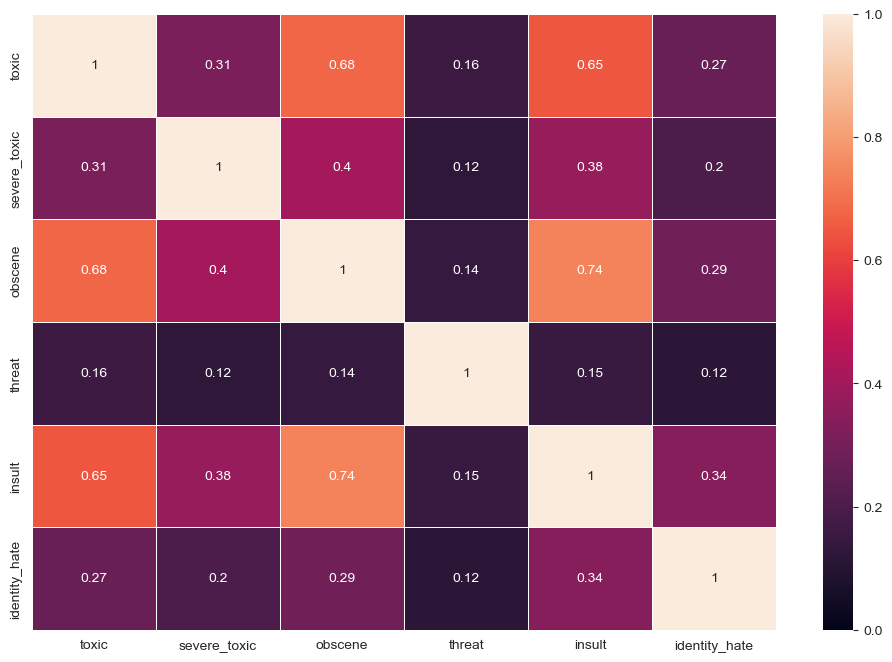

In [15]:
# Visualize correlation matrix
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    linewidths=0.5,
    ax=ax,
    vmin=0,
    vmax=1
)
plt.show()

The above plot indicates a pattern of co-occurrance. It does not apply here, since the variables involved are `categorical` variables.

In [16]:
column_names = corr_columns + ["is_clean"]
for col in column_names:
    print("\n* {} comment:".format(col))
    print(X[X[col] == 1]["comment_text"].iloc[np.random.randint(0, 20)])


* toxic comment:
My Band Page's deletion. You thought I was gone. 

Deleting the comment I posted on your 'talk page' does not delete my feelings for your hasty decision to delete my page. You, sir, are still a cock-sucking douche fuck. Sit back for a second and think about what your life has become. ............ Done? That didn't take long did it? Nope. Because, as I am most certainly aware, your life is a shitstorm of sitting in front of the computer masturbating to fictional creatures. Your attempts to get rid of me are mediocre at best. You are constantly sucking the dick of failure. You don't want a personal attack, huh? Well, too bad, Fuckcock McDickerson. You've got one. From me. You can go ahead and delete my profile from wikipedia. I'll just make another one and come right back to 'Syrthiss's talk page and insult the dick off of you. How could you shatter the dreams of an innocent eighteen year old college freshman trying to make a name for his band. Does that make you happy?

We can see that each comment is includes alphanumeric and special symbols.

#### Save DataFrame

In [17]:
X.to_csv(path_or_buf="../notebooks/EDA_")

AttributeError: 'DataFrame' object has no attribute 'to'